**This notebook shows the concept of a Adaline algorithm with two features, one of the simplest neural network structure after perceptron.**

# 1 Training Dataset Creation
First define a few parameters to generate the data to be used to train an Adaline algorithm. Here we assume two groups with label -1 and 1 and the two classes are balanced (i.e. the number of data points are the same in two groups). We define N to be the number of data points in each group. The (x, y) coordinates for each data points are randomly created from a uniform distribution. For group with label -1, the coordiate of each data points are randomly created between 0 and 1. For group with label -1, the coordinate of each data points are randomly created between (x_offset, 1+x_offset) and (y_offset, 1+y_offset). A larger x_offset and y_offset (for example 1.0) can create linearly seperable dataset, while a smaller x_offset and y_offset (for example 0.2) can create not linearly seperable dataset.

In [1]:
N = 50 # total number of data points each group
x_offset = 0.5 # group seperation on x axis
y_offset = 0.5 # group seperation on y axis

In [2]:
g1_x = runif(N, min = 0, max = 1)
g1_y = runif(N, min = 0, max = 1)

g2_x = runif(N, min = 0+x_offset, max = 1+x_offset)
g2_y = runif(N, min = 0+y_offset, max = 1+y_offset)

g_x = c(g1_x, g2_x)
g_y = c(g1_y, g2_y)
group = c(rep(-1,N), rep(1,N))

print(g_x)
print(g_y)
print(group)

  [1] 0.50816632 0.44923883 0.38513907 0.87870641 0.91366853 0.01556226
  [7] 0.51307548 0.03323430 0.42775425 0.30130906 0.50567222 0.90517487
 [13] 0.70363057 0.90190846 0.02473317 0.44428728 0.22067484 0.96600194
 [19] 0.51937071 0.30980489 0.38408802 0.26925270 0.07169545 0.56379329
 [25] 0.87889270 0.81602247 0.07773241 0.82604744 0.37254944 0.46975826
 [31] 0.22839945 0.62847730 0.54038268 0.81002020 0.12877861 0.98010921
 [37] 0.50690720 0.50928458 0.77483963 0.84366760 0.06317139 0.46781265
 [43] 0.84355209 0.22561108 0.64961015 0.90953548 0.60004837 0.63880748
 [49] 0.88219687 0.11983539 0.58262806 1.03046065 1.05111360 1.43561161
 [55] 0.86979846 1.20313242 0.87230699 0.68124086 1.16992979 0.59458425
 [61] 0.80339691 0.67254180 0.61822744 0.91373159 1.24130919 1.49279427
 [67] 0.97837213 1.15839918 0.72597961 1.39074937 1.26342077 1.16896594
 [73] 1.11794208 1.17256348 1.26597703 0.50025893 1.31809899 1.04748521
 [79] 1.36780616 1.09050599 0.91702014 1.11739518 0.85816455 0.9

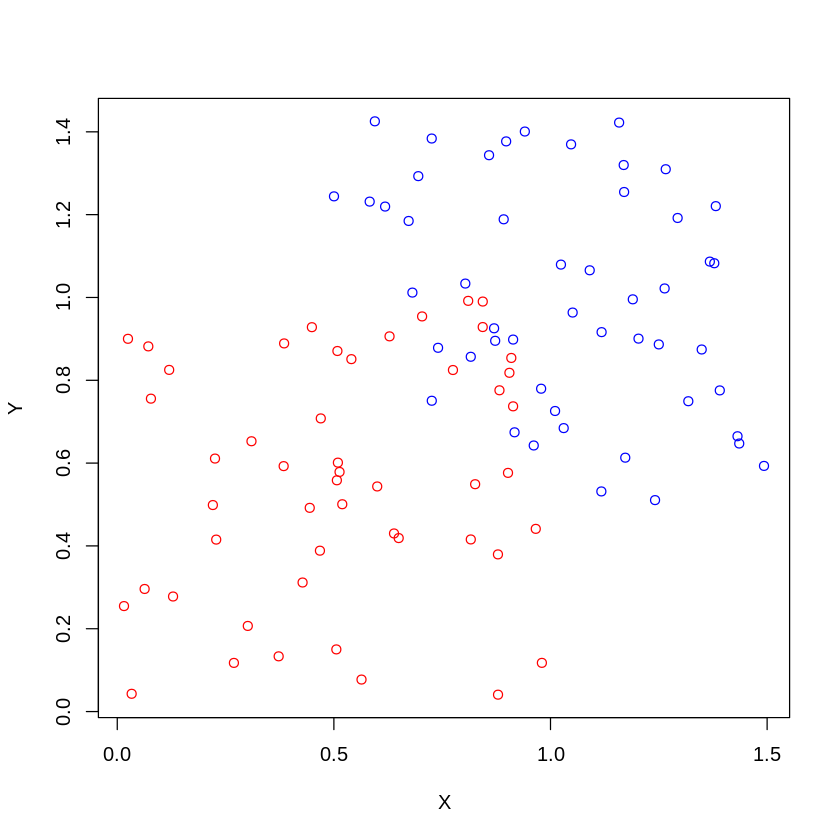

In [3]:
plot(g_x, g_y, type='n', xlab='X', ylab='Y')
points(g1_x, g1_y, col='red')
points(g2_x, g2_y, col='blue')

# 2 Define Adaline Parameters
Here we define a few parameters for an Adaline model. The initial weights can be randomly choosen. M is the number of epoches to run, eta is the learning rate, and th is the accuracy threshold to stop. The training will stop if we reach the number of epoches or the accuracy is larger than the accuracy threshold. Please note, if the two groups are not perfectly linearly seperatable, then perceptron is never going to stop. So we add two stop critera here: (1) number of epochs, and (2) the threshold of accuracy, such that the program is going to stop when either criteria meet. Verbose is a flag to indicate whether we want to see more details of each weight update.

In [4]:
w0 = 0.1 # initial weitht
w1 = 0.2 # initial weight
w2 = 0.3 # initial weitht

M = 15            # number of epochs to run
eta = 0.005       # learning rate
th = 0.9          # threshold to stop
verbose = F   # whether detailed weight update info is printed

# 3 Adaline Stochastic Gradient Descent (SGD) Model
The Adaline SGD model use the loss function of square error at each data points and it will update the weight at each data point as well using the first derivative of the loss function. It is defined in the below embeded for loops with the outer loop for epoch and the inner loop for weight update of each data point. The accuracy is calculated after each epoch to decide whether next epoch is needed or not. For each epoch, the order of data points to update the weight is randomly shuffled.

In [5]:
for (i in 1:M){
    print(paste('Epoch starts: ', i))
    
    ## We reshuffle the order of the datapoint for each epoch.
    index = 1:(2*N)
    index = sample(index)
    
    for (j in index){
        y_j = w0 + w1*g_x[j] + w2*g_y[j]
        
        w0 = w0 + eta*(group[j] - y_j)*1.0
        w1 = w1 + eta*(group[j] - y_j)*g_x[j]
        w2 = w2 + eta*(group[j] - y_j)*g_y[j]
        if (verbose == T){
            print(paste('  -> updating data point ', j, ' : '))
            print(paste('     -> w0: ' ,w0))
            print(paste('     -> w0: ' ,w1))
            print(paste('     -> w0: ' ,w2))
        }
    }  
    y_all = w0 + w1*g_x + w2*g_y
    y_pred = y_all
    y_pred[y_all >= 0] = 1
    y_pred[y_all< 0] = -1
    
    acc = sum(y_pred == group)/length(group)
    print(paste('Epoch ends: ', i, ' WITH accuracy: ', acc))
    if (acc >= th){
      break
    }
}        

[1] "Epoch starts:  1"
[1] "Epoch ends:  1  WITH accuracy:  0.55"
[1] "Epoch starts:  2"
[1] "Epoch ends:  2  WITH accuracy:  0.63"
[1] "Epoch starts:  3"
[1] "Epoch ends:  3  WITH accuracy:  0.76"
[1] "Epoch starts:  4"
[1] "Epoch ends:  4  WITH accuracy:  0.8"
[1] "Epoch starts:  5"
[1] "Epoch ends:  5  WITH accuracy:  0.81"
[1] "Epoch starts:  6"
[1] "Epoch ends:  6  WITH accuracy:  0.82"
[1] "Epoch starts:  7"
[1] "Epoch ends:  7  WITH accuracy:  0.84"
[1] "Epoch starts:  8"
[1] "Epoch ends:  8  WITH accuracy:  0.84"
[1] "Epoch starts:  9"
[1] "Epoch ends:  9  WITH accuracy:  0.87"
[1] "Epoch starts:  10"
[1] "Epoch ends:  10  WITH accuracy:  0.86"
[1] "Epoch starts:  11"
[1] "Epoch ends:  11  WITH accuracy:  0.86"
[1] "Epoch starts:  12"
[1] "Epoch ends:  12  WITH accuracy:  0.88"
[1] "Epoch starts:  13"
[1] "Epoch ends:  13  WITH accuracy:  0.86"
[1] "Epoch starts:  14"
[1] "Epoch ends:  14  WITH accuracy:  0.87"
[1] "Epoch starts:  15"
[1] "Epoch ends:  15  WITH accuracy:  0.88"

Now let us check the prediction for each data points with the final weight from the SGD Adaline Algorithm algorithm and plot the final trained SGD Adaline Algorithm model (i.e. the dashed line in the graph).

In [6]:
print(c(w0,w1,w2))

y_all = w0 + w1*g_x + w2*g_y
print(y_all)

y_pred = y_all
y_pred[y_all >= 0] = 1
y_pred[y_all< 0] = -1

print(y_pred)

acc = sum(y_pred == group)/length(group)
print(acc)

[1] -0.9336518  0.7082693  0.6003659
  [1] -0.05097855 -0.05819181 -0.12713101 -0.08343483  0.15599109 -0.76970366
  [7] -0.22285138 -0.88436942 -0.44359166 -0.59611535 -0.48539741  0.19859542
 [13]  0.13759193  0.05118249 -0.37570885 -0.32363305 -0.47795628  0.01541396
 [19] -0.26522564 -0.32232434 -0.30577636 -0.67241533 -0.35342627 -0.48794750
 [25] -0.28668570 -0.10616234 -0.42493052 -0.01896943 -0.58973454 -0.17592319
 [31] -0.52257455  0.05546059 -0.03996970  0.23551716 -0.67563709 -0.16888202
 [37] -0.23933479 -0.21203822  0.11033225  0.25833996 -0.71117650 -0.36907573
 [43]  0.22128944 -0.40705062 -0.22203672  0.22323193 -0.18230471 -0.22298354
 [49]  0.15696718 -0.35341590  0.21834772  0.20715231  0.38931596  0.47175979
 [55]  0.23805788  0.45918838  0.22171510  0.15629643  0.64825591  0.34321245
 [61]  0.25589730  0.25398906  0.23638868  0.25284905  0.25208829  0.47979643
 [67]  0.22738194  0.74074121  0.03116077  0.51698695  0.57463375  0.68668185
 [73]  0.40825644  0.264925

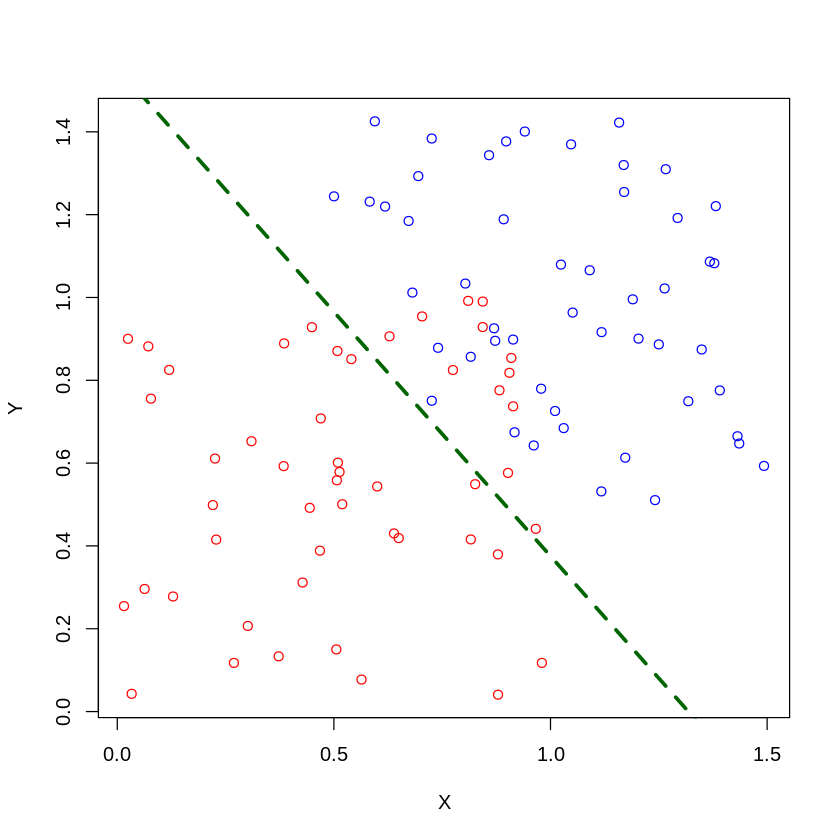

In [7]:
plot(g_x, g_y, type='n', xlab='X', ylab='Y')
points(g1_x, g1_y, col='red')
points(g2_x, g2_y, col='blue')
abline(a = -1.0*w0/w2, b = -1.0*w1/w2, col='dark green', lwd=3, lty=2)